Text unitaire
 verificar que nuestro preprocesamiento de texto funciona correctamente. Este test comprobará que nuestra función de eliminación de stopwords y lematización están haciendo su trabajo.
 
 Este código define una clase TestPreprocessing que hereda de unittest.TestCase. Dentro de esta clase, definimos un par de métodos, cada uno de los cuales comprueba una función de preprocesamiento.

El método test_remove_stop_words comprueba si la función remove_stop_words está eliminando correctamente las stopwords del francés. Hacemos esto al proporcionar un texto de entrada y luego comprobamos que la salida coincide con la salida esperada.

De manera similar, el método test_lemmatize_text comprueba si la función lemmatize_text está lematizando correctamente las palabras en francés.

Por último, la línea unittest.main() al final del script es la que realmente ejecuta las pruebas.

Data processing _ cleaning _ Dataset label sentiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
import unittest

# Carga de modelo en francés de Spacy
print("Cargando el modelo de Spacy en francés...")
nlp = spacy.load('fr_core_news_sm')


Cargando el modelo de Spacy en francés...


In [2]:
df = pd.read_excel('../../dataset/data_Sentiment_Label.xlsx')
print(df.head())

   #                                             phrase  label    sentiment
0  1   Putain de merde, encore une fois tout va de t...      0  frustration
1  2   J'en ai ras le bol, rien ne se passe comme prévu      0  frustration
2  3   Ça me gonfle sérieusement, rien ne fonctionne...      0  frustration
3  4   Bordel, pourquoi est-ce que tout est si compl...      0  frustration
4  5   C'est vraiment la goutte d'eau qui fait débor...      0  frustration


In [3]:
# Función para eliminar las palabras inservibles
def remove_stop_words(text):
    doc = nlp(text)
    filtered_sentence = [token.text for token in doc if token.is_stop == False]
    return ' '.join(filtered_sentence)

# Función para lematizar el texto (estado original del verbo)
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

In [4]:
# Impresion de etiquetas
print("Etiquetas:")
print(df['label'].unique())

Etiquetas:
[0 1 2 3 4]


In [5]:
# Crear una nueva columna 'phrase' 
print("Preprocesando los datos...")
df['phrase'] = df['phrase'].str.replace("[^a-zA-Z#]", " ")
df['phrase'] = df['phrase'].str.lower()
df['phrase'] = df['phrase'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

# Mostrar datos después de las primeras transformaciones
print("Datos después de la limpieza inicial:")
print(df.head())

Preprocesando los datos...
Datos después de la limpieza inicial:
   #                                             phrase  label    sentiment
0  1       putain de encore une fois tout va de travers      0  frustration
1  2             ai ras le rien ne se passe comme prévu      0  frustration
2  3      ça me gonfle rien ne fonctionne comme il faut      0  frustration
3  4                 pourquoi que tout est si compliqué      0  frustration
4  5  vraiment la goutte qui fait déborder le je ne ...      0  frustration


In [6]:

# Aplicar la función para eliminar palabras vacías
print("Eliminando palabras vacías...")
df['phrase'] = df['phrase'].apply(remove_stop_words)
print("Datos después de eliminar palabras vacías:")
print(df.head())

Eliminando palabras vacías...
Datos después de eliminar palabras vacías:
   #                              phrase  label    sentiment
0  1                 putain fois travers      0  frustration
1  2                ras rien passe prévu      0  frustration
2  3         gonfle rien fonctionne faut      0  frustration
3  4                           compliqué      0  frustration
4  5  vraiment goutte déborder supporter      0  frustration


In [7]:

# Aplicar la función de lematización
print("Lematizando el texto...")
df['phrase'] = df['phrase'].apply(lemmatize_text)
print("Datos después de la lematización:")
print(df.head())

Lematizando el texto...
Datos después de la lematización:
   #                              phrase  label    sentiment
0  1                 putain fois travers      0  frustration
1  2             ras rien passer prévoir      0  frustration
2  3      gonfle rien fonctionne falloir      0  frustration
3  4                          compliquer      0  frustration
4  5  vraiment goutte déborder supporter      0  frustration


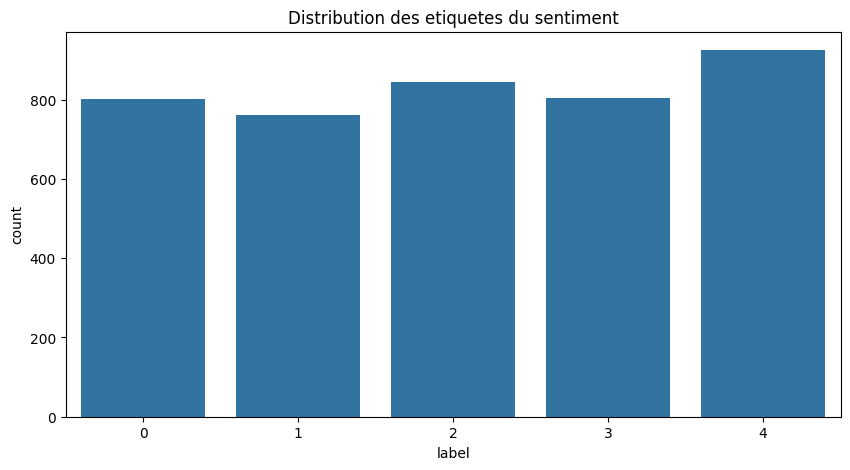

In [8]:

# Graficar la distribución de las etiquetas
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df)
plt.title('Distribution des etiquetes du sentiment')
plt.show()

Generando WordCloud...


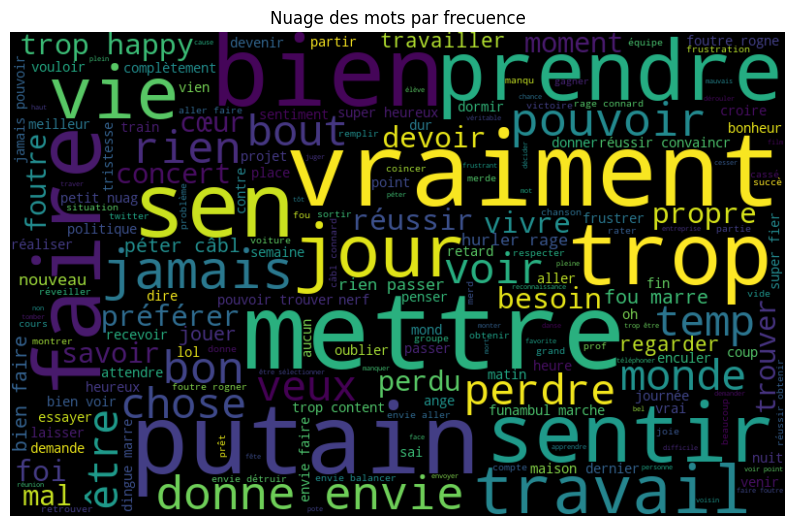

In [9]:

# Creamos un wordcloud con todas las palabras
print("Generando WordCloud...")
all_words = ' '.join([text for text in df['phrase']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nuage des mots par frecuence')
plt.show()

In [10]:

# Pruebas unitarias para las funciones de procesamiento de texto
class TestPreprocessing(unittest.TestCase):
    
    def test_remove_stop_words(self):
        text = "c'est un bummer"
        expected_output = "bummer"
        self.assertEqual(remove_stop_words(text), expected_output, 
                         "Devrait supprimer les mots vides du texte en français")

    def test_lemmatize_text(self):
        text = "vous avez"
        expected_output = "vous avoir"
        self.assertEqual(lemmatize_text(text), expected_output,
                         "Devrait lemmatiser les mots français à leur forme de base")

# Correr las pruebas
print("Ejecutando pruebas unitarias...")
unittest.main(argv=[''], exit=False)
print("Pruebas unitarias completadas.")

Ejecutando pruebas unitarias...


..
----------------------------------------------------------------------
Ran 2 tests in 0.417s

OK


Pruebas unitarias completadas.
